# **SME0142 - Álgebra Linear e Aplicações**
Docente: Cynthia de Oliveira Lage Ferreira


# **Trabalho Prático**
Outubro de 2025

# Aluno:

# Orientações Gerais

*   Esta avaliação é **individual ou em dupla** e deverá ser desenvolvida na plataforma Colab (https://colab.research.google.com/).

*   Cada aluno/dupla deverá produzir um arquivo .ipynb contendo as soluções dos exercícios. Sejam organizados !

*   Os arquivos deverão estar identificados por **NOMEDOALUNO1NoUSP-NOMEDOALUNO2NoUSP.ipynb** a fim de facilitar a organização das atividades pela professora.

*  Os arquivos deverão ser enviados **até às 20h do dia 18/10/2025** através da plataforma e-disciplinas da USP (https://edisciplinas.usp.br/). **Os arquivos recebidos por e-mail não serão corrigidos.** Arquivos enviados fora do prazo também não serão corrigidos!

*   Apenas os alunos que estiverem com a **situação regularizada no Sistema Jupiter** terão suas avaliações corrigidas.

*  Todos os códigos utilizados para resolver os problemas deverão ser apresentados, executados e minimamente comentados. **Questões com respostas sem justificativas não serão consideradas.**

**BOM TRABALHO!**

In [ ]:
#Bibliotecas Utilizadas
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

# **Exercício 1**
Considere o espaço vetorial real $\mathbb{R}^2$. Sejam as transformações
- $T_1:\mathbb{R}^2 \to \mathbb{R}^2$ tal que $T_1(x,y)=(-x,y)$ - **reflexão em torno do eixo $oy$**;
- $T_2:\mathbb{R}^2 \to \mathbb{R}^2$ tal que a matriz da transformação é dada por
$$[T_2] = \begin{bmatrix} 1 & k \\ 0 & 1 \end{bmatrix},$$
com $k\in\mathbb{R}$ - **cisalhamento horizontal**.

a) Aplique as transformações $T_1$ e $T_2$ no quadrado de vértices $(0,0)$, $(1,0)$, $(1,1)$ e $(0,1)$ considerando o parâmetro $k= -0,5$ e visualize os resultados.

b) Determine a matriz da transformação $T_3$ que primeiro faz um cisalhamento horizontal com $k=-0.5$ mapeando $e_2$ em $e_2 - 0.5e_1$ ($e_1$ se mantém inalterado) e então reflete o resultado em torno do eixo $oy$. **Dica:** Determine a posição final das imagens de $e_1$ e $e_2$.

c) Qual a relação entre as matrizes $[T_1]$, $[T_2]$ e a matriz da transformação $[T_3]$ obtida no item anterior?

d) Determine a transformação de reflexão em torno do eixo $ox$ e a transformação de cisalhamento vertical.

Text(0.5, 1.0, 'Cisalhamento')

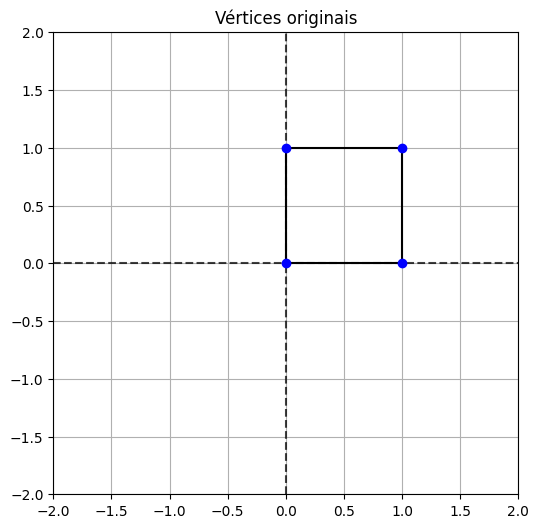

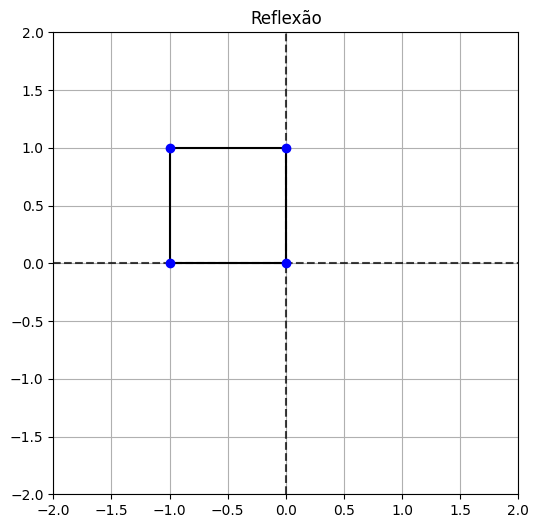

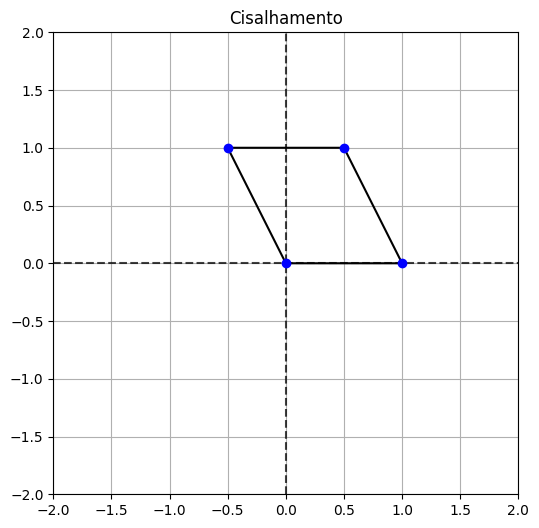

In [ ]:
# Solução 1
# Vértices do quadrado

Q = np.array([[0,0],[1,0],[1,1],[0,1]]).T

# Reflexão em torno do eixo y
# (-x,y) = x(-1,0) + y(0,1)
T1 = np.array([[-1,0],[0,1]])

# Cisalhamento horizontal
k = -0.5
T2 = np.array([[1,k],[0,1]])

# Aplicando as transformações
T1Q = T1 @ Q
T2Q = T2 @ Q

def plotSimples(vx, vy):
  plt.figure(figsize=(6,6))
  plt.axis([-2, 2, -2, 2])
  plt.plot([-2,2], [0,0], 'k--', alpha=0.75)
  plt.plot([0,0], [-2,2],'k--', alpha=0.75)
  plt.plot(vx, vy, 'k')
  plt.plot([vx[0], vx[-1]], [vy[0], vy[-1]], 'k')
  plt.plot(vx, vy, 'bo')
  plt.grid('True')

# Plots
plotSimples(Q[0,:], Q[1,:])
plt.title('Vértices originais')

plotSimples(T1Q[0,:], T1Q[1,:])
plt.title('Reflexão')

plotSimples(T2Q[0,:], T2Q[1,:])
plt.title('Cisalhamento')

[[-1.   0.5]
 [ 0.   1. ]]
[[-1.  -0.5]
 [ 0.   1. ]]


Text(0.5, 1.0, 'Cisalhamento vertical')

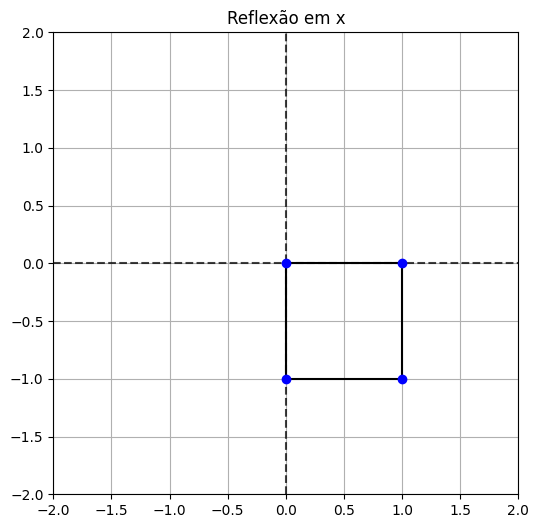

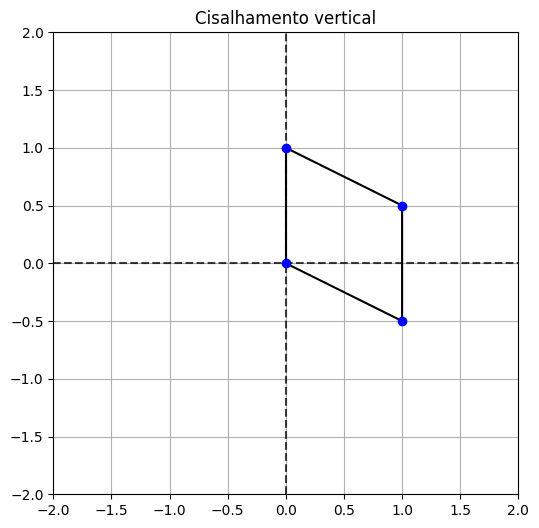

In [18]:
#Solução 2)
# Observando as posições finais de e1 e e2 temos:
# T3(1,0) = (-1,0)
# T3(0,1) = (0.5,1)
T3 = T1 @ T2
print(T3)

# Solução 3)
# Por outro lado, aplicando T1, depois T2
# T3(1,0) = (-1,0)
# T3(0,1) = (-0.5,1)
T3 = T2 @ T1
print(T3)
# Assim, fica evidente que a relação entre as matrizes T2 e T1 com T3 se sá pois T3 é a multplicação entre T1 e T2


# Solução 4)
# Reflexão em torno do eixo x
T4 = np.array([[1,0],[0,-1]])

# Cisalhamento vertical
T5 = np.array([[1,0],[k,1]])

# Aplicando as transformações
T4Q = T4 @ Q
T5Q = T5 @ Q

# Plots
plotSimples(T4Q[0,:], T4Q[1,:])
plt.title('Reflexão em x')

plotSimples(T5Q[0,:], T5Q[1,:])
plt.title('Cisalhamento vertical')

# **Exercício 2**
Considere a transformação $T:R^7 \rightarrow R^3$ linear dada pela matriz

$$
\left(\begin{array}{ccccccc}
3 & 9 & 6 & 6 & 9 & 3 & 1\\
2 & 0 & 9 & 2 & 0 & 5 & 3\\
0 & 0 & 1 & 0 & 1 & 0 & 2
\end{array}\right)
$$

a) Qual a dimensão do núcleo e da imagem da transformação? Faça um código para determinar a dimensão da imagem e conclua, então, a dimensão do núcleo.

b) Encontre uma base para o espaço núcleo.

c) Faça um código para verificar que a base encontrada está gerando o núcleo.

In [ ]:
B = np.asarray([[3, 9, 6, 6, 9, 3, 1],
                [2, 0, 9, 2, 0, 5, 3],
                [0, 0, 1 , 0, 1, 0, 2]])
# Solução "a"

# SOlução "b"

# Solução "c"


2


# **Exercício 3**

a) Dada uma base qualquer de um subespaço vetorial do $R^{n}$, escreva um código para encontrar uma base ortonormal para este subespaço. Teste o seu código para a base dada pelas colunas da matriz  **V**  gerada no código abaixo.

b) Faça um teste para verificar que a base obtida é de fato ortonormal.

In [ ]:
V = np.random.randint(0,20,size=(20,10))
print(V)

[[12  2 17 15  1 19  9 11 12 11]
 [ 9  9  3  1 11 19 19 17  4 17]
 [15 17  1  6 18 18 18  7 19 11]
 [ 7  3  4 13 19 10  9  7  5  3]
 [13 19  4  2  1 11 15  2 15 16]
 [16  5  1  4 17 11  1  7  9 12]
 [15 16  4 10 14 13 16  7 16 18]
 [14 10  3 13 12 10 17  6 13 13]
 [ 8  4  9  6 17  2  9 10  3  7]
 [16  9  1 19  3  6  4  4  7  4]
 [13 13 13  5 14 18 12 16  1 11]
 [ 2  6  8 14 15  1  1 15  4  7]
 [ 1 15  6  0  6 13  4 15  7  3]
 [11  9  9 12 19 17 11 16 17 10]
 [ 3  4  3 15 10 12  4 17 12  4]
 [ 7  6  9 17 16  3 16 19 12  4]
 [14  3  2  3 18  9 17 19  3  9]
 [ 0  9 11 16  1  4  6 15 14 10]
 [18  4 19 13 11 16  3 18 19  1]
 [10  2  2 17  8  0 15 10 15 14]]


In [ ]:
# a) Ortonormalização de uma base qualquer dada e teste do código em V

def gram_schmidt(x):


Q = gram_schmidt(V)


# b) Teste que verifica se a base obtida é de fato ortonormal



# **Exercício 4**


Considere a seguinte rede não direcionada composta por 12 nós, com conexões definidas pela matriz de adjacência abaixo (os nós estão numerados de 1 a 12).

A rede foi construída com o objetivo de evidenciar a diferença entre duas medidas de centralidade: **centralidade de grau** e **centralidade de autovalor**.

### **Matriz de Adjacência**

A matriz a seguir é referente a rede considerada. Um valor $1$ na posição $(i,j)$ indica uma conexão entre os nós $i$ e $j$; $0$ indica ausência de conexão.



A =
\begin{bmatrix}
0 & 1 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 1 & 1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 & 1 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
\end{bmatrix}







Com base na estrutura da rede acima, realize as seguintes tarefas:

    

a)   Calcule a centralidade de grau para cada nó. Liste os nós com maior centralidade de grau.

b)   Calcule a centralidade de autovalor para cada nó. Liste os nós com maior centralidade de autovalor.

c)   Há nós com alta centralidade de grau mas baixa centralidade de autovalor? Justifique com base na estrutura da rede.


d)   Há nós com baixa centralidade de grau mas alta centralidade de autovalor? Explique o motivo.

e)   Discuta as diferenças entre as duas centralidades à luz dos resultados obtidos.




    
    
    
    













In [ ]:
arr = np.array([
 [0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
 [1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
])


# Criar o grafo
G = nx.from_numpy_array(arr)

# Calcular centralidades
deg_centrality = nx.degree_centrality(G)
eig_centrality = nx.eigenvector_centrality(G)

# Exibir tabela
centrality_df = pd.DataFrame({
    "Grau": deg_centrality,
    "Autovalor": eig_centrality
}).sort_index().round(4)

print("Centralidades dos nós:\n")
print(centrality_df)

# Visualizar o grafo



# **Exerício 5**

Em um cenário onde um analista de dados possui uma coleção de documentos textuais de natureza variada — como notícias, publicações em redes sociais, ou descrições de produtos —, surge a necessidade de identificar automaticamente os **principais temas ou tópicos** abordados nesses textos. Tal tarefa é especialmente relevante em contextos onde os dados são não rotulados e o volume de documentos inviabiliza a análise manual.


**Objetivo:**
Dado um conjunto de 10 manchetes de notícias, aplicar **Análise Semântica Latente (LSA) via SVD** para identificar **temas comuns** (conceitos latentes) e analisar a relevância de palavras e documentos.

---

# **Conjunto de manchetes**

1. Time vence campeonato nacional
2. Jogador é destaque na vitória do time
3. Equipe perde final em jogo equilibrado
4. Treinador elogia desempenho da equipe
5. Jogador marca gol decisivo no campeonato
6. Time reage e vence partida importante
7. Jogador lidera equipe rumo à final
8. Equipe conquista vitória histórica
9. Treinador anuncia substituição estratégica
10. Jogador decide jogo com gol de empate
11. Bolsa de valores sobe após anúncio econômico
12. Mercado financeiro reage a nova política fiscal
13. Inflação preocupa investidores e governo
14. Governo anuncia medidas para controlar inflação
15. Mercado de ações fecha em alta
16. Valores da bolsa aumentam com relatório positivo
17. Investidores reagem à decisão do banco central
18. Política econômica impacta mercado financeiro
19. Inflação e desemprego influenciam investidores
20. Governo divulga plano fiscal detalhado



**Procedimento matemático**

 **Representação:**

   * Construir uma **matriz termo-documento** $A \in \mathbb{R}^{m \times 10}$, com linhas correspondendo a **palavras relevantes** (substantivos e verbos de ação) e colunas aos documentos.
   * Cada elemento $a_{ij}$ indica a presença ou frequência da palavra $i$ no documento $j$.

 **Decomposição SVD:**
   $
   A = U  \Sigma  V^T
   $

   * $U \in \mathbb{R}^{m \times r}$: indica a participação das palavras nos conceitos latentes
   * $\Sigma \in \mathbb{R}^{r \times r}$: indica a importância de cada conceito
   * $V \in \mathbb{R}^{10 \times r}$: indica a participação dos documentos nos conceitos latentes
   * $r = \text{posto}(A)$


a) Qual é o tema dominante no conjunto de manchetes? Qual é secundário?

b) Quais palavras (substantivos ou verbos) são mais representativas de cada tema? Liste 5 de cada.

c) Quais são os 5 documentos mais representativas de cada tema?

d) Como os verbos de ação contribuiram para a distinção entre os temas?




In [ ]:
# LSA com SVD em 20 manchetes, vocabulário único e verbos de ação
from sklearn.feature_extraction.text import CountVectorizer # você pode usar esta função para montar a matriz termo-documento
from sklearn.decomposition import TruncatedSVD


# Conjunto de 20 manchetes
documents = [
    # Esportes
    "Time vence campeonato nacional",
    "Jogador é destaque na vitória do time",
    "Equipe perde final em jogo equilibrado",
    "Treinador elogia desempenho da equipe",
    "Jogador marca gol decisivo no campeonato",
    "Time reage e vence partida importante",
    "Jogador lidera equipe rumo à final",
    "Equipe conquista vitória histórica",
    "Treinador anuncia substituição estratégica",
    "Jogador decide jogo com gol de empate",
    # Economia
    "Bolsa de valores sobe após anúncio econômico",
    "Mercado financeiro reage a nova política fiscal",
    "Inflação preocupa investidores e governo",
    "Governo anuncia medidas para controlar inflação",
    "Mercado de ações fecha em alta",
    "Valores da bolsa aumentam com relatório positivo",
    "Investidores reagem à decisão do banco central",
    "Política econômica impacta mercado financeiro",
    "Inflação e desemprego influenciam investidores",
    "Governo divulga plano fiscal detalhado"
]

# Vocabulário restrito a palavras-chave (substantivos + verbos de ação), sem duplicatas
vocabulary = [
    # Esportes
    "time", "jogador", "campeonato", "vitória", "equipe", "final", "jogo", "treinador", "gol",
    "vence", "marca", "perde", "reage", "decide", "conquista", "anuncia", "lidera", "substituição",
    # Economia
    "bolsa", "valores", "mercado", "financeiro", "inflação", "investidores", "governo",
    "sobe", "preocupa", "divulga", "impacta", "aumentam", "decisão", "plano"
]

#Matriz termo-documento (contagem simples)


# Aplicar SVD (LSA)
k = 2  # número de temas latentes


# Palavras mais importantes por tema
n_top_words = 5



# Documentos mais associados a cada tema
n_top_docs = 5
